<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/4_Std_dataset_initial_modelling_(all_simple_models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Initial modelling (all simple models based on Std_dataset) including Linear Regression, Randon Forest Regression, XGBoost Regressor, Gradient Bost Regressor (with 3 alternatives for PC), Base LSTM and Enhanced LSTM

---

# LOAD LIBRARIES


In [ ]:
!pip install python-docx
!pip install tensorflow
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and Time Utilities
from datetime import datetime

# Machine Learning - Model Selection and Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Metrics for Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Deep Learning with Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Wrapper for Keras models

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hyperparameter Tuning
from scipy.stats import uniform, randint

# Suppress user warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from tabulate import tabulate

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

sns.set(style='white', context='notebook', palette='deep')

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white', context='notebook', palette='deep')
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
# Import required libraries
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor  # Ensemble Regressors
from xgboost import XGBRegressor  # XGBoost Regressor
from sklearn.neural_network import MLPRegressor  # Multi-layer Perceptron Regressor

# Metrics for evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Visualization and utility
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # For summary table


# LOAD DATASET

In [ ]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Define file path for 'Std_Datasetv4.csv'
file_path = os.path.join(subdirectory, 'Std_Datasetv4.csv')

# Check if the file exists, then load it as 'merged_dataset'
if os.path.exists(file_path):
    merged_dataset = pd.read_csv(file_path)
    print(f"[INFO] File 'Std_Datasetv4.csv' loaded successfully!")
    print(f"[INFO] DataFrame 'merged_dataset' shape: {merged_dataset.shape}")
    print(merged_dataset.head())  # Display the first few rows for verification
else:
    print(f"[ERROR] File 'Std_Datasetv4.csv' not found in '{subdirectory}'. Please check the file path.")

Mounted at /content/drive
[INFO] File 'Std_Datasetv4.csv' loaded successfully!
[INFO] DataFrame 'merged_dataset' shape: (105114, 71)
   saleable_area(ft^2)  unit_rate     floor       CPI        IR        MW  \
0             0.260534  -0.314185  1.757769  1.318729 -1.059593 -1.524527   
1             0.223632  -0.424514  0.501134  1.318729 -1.059593 -1.524527   
2            -0.390423  -0.383380 -0.001520  1.318729 -1.059593 -1.524527   
3             1.857067  -1.080034  0.878125  1.318729 -1.059593 -1.524527   
4             1.163345  -0.751664  0.417359  1.318729 -1.059593 -1.524527   

         M3        UR       GDP        CI  ...  floor_height_floor_46to50  \
0 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
1 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
2 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
3 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
4 -0.604983  2.9946

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105114 entries, 0 to 105113
Data columns (total 71 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   saleable_area(ft^2)                             105114 non-null  float64
 1   unit_rate                                       105114 non-null  float64
 2   floor                                           105114 non-null  float64
 3   CPI                                             105114 non-null  float64
 4   IR                                              105114 non-null  float64
 5   MW                                              105114 non-null  float64
 6   M3                                              105114 non-null  float64
 7   UR                                              105114 non-null  float64
 8   GDP                                             105114 non-null  float64
 9   CI                        

# OPTION 2 - STD_DATASET


# INITIAL MODELLING

[INFO] Initialized a new master results table.

Training models for BASE target variable: new_price

MODEL: Linear Regression
Train R² Score: 0.685
Test R² Score: 0.684
Mean Absolute Error (MAE): 0.439
Mean Squared Error (MSE): 0.314
Root Mean Squared Error (RMSE): 0.560
Mean Absolute Percentage Error (MAPE): 239.092%
Performance Classification: Normal

MODEL: Random Forest Regressor
Train R² Score: 0.977
Test R² Score: 0.851
Mean Absolute Error (MAE): 0.252
Mean Squared Error (MSE): 0.147
Root Mean Squared Error (RMSE): 0.384
Mean Absolute Percentage Error (MAPE): 140.668%
Performance Classification: Normal

MODEL: XGBoost Regressor
Train R² Score: 0.841
Test R² Score: 0.801
Mean Absolute Error (MAE): 0.328
Mean Squared Error (MSE): 0.198
Root Mean Squared Error (RMSE): 0.445
Mean Absolute Percentage Error (MAPE): 179.455%
Performance Classification: Normal

MODEL: Gradient Boosting Regressor
Train R² Score: 0.804
Test R² Score: 0.785
Mean Absolute Error (MAE): 0.343
Mean Squared Erro

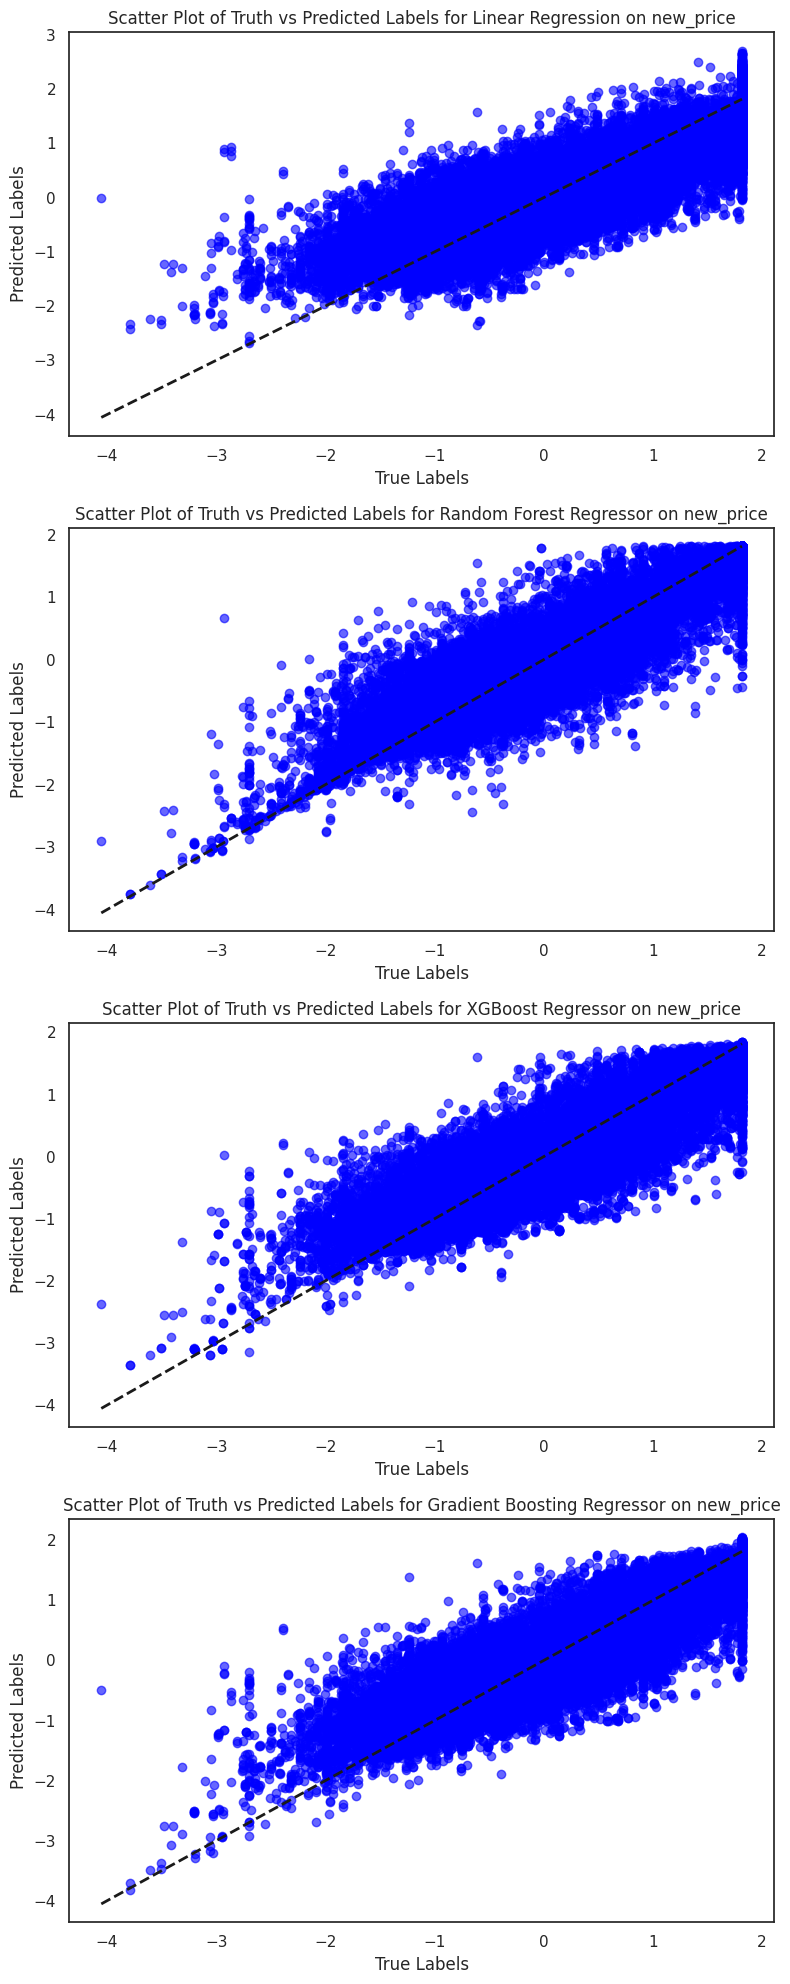

[INFO] Master results table updated and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
      Target                        Model  Train R²   Test R²       MAE  \
0  new_price            Linear Regression  0.685435  0.683708  0.439345   
1  new_price      Random Forest Regressor  0.977331  0.851468  0.252210   
2  new_price            XGBoost Regressor  0.840576  0.800946  0.327958   
3  new_price  Gradient Boosting Regressor  0.803861  0.784936  0.343109   

        MSE      RMSE        MAPE Comments  
0  0.314043  0.560396  239.091754   Normal  
1  0.147476  0.384026  140.667582   Normal  
2  0.197639  0.444566  179.455016   Normal  
3  0.213535  0.462099  194.677003   Normal  


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to classify model performance
def classify_performance(train_r2, test_r2):
    """
    Classify the performance of a model based on Train R² and Test R² scores.
    """
    if train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    elif train_r2 > 0.9 and test_r2 < 0.7:
        return "Overfitting"
    else:
        return "Normal"

# Columns to preserve for LSTM and date-related modeling
date_columns = ['Year', 'Month', 'Day', 'DayOfWeek', 'ElapsedDays']

# Drop `unit_rate` as it is a derived column and exclude date columns for regression models
features = merged_dataset.drop(columns=['new_price', 'PC', 'unit_rate'] + date_columns)  # Drop targets, `unit_rate`, and date columns
target = merged_dataset[['new_price']]  # Use only `new_price` as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Initialize models and their names
models = [
    "Linear Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None),
    XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=500, max_depth=10),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Function to evaluate a single model
def evaluate_model(regressor, model_name, X_train, X_test, y_train, y_test, target_name):
    """
    Evaluate a single model and return the metrics as a dictionary.
    """
    # Fit the model
    regressor.fit(X_train, y_train.flatten())  # Flatten target array for compatibility
    train_prediction = regressor.predict(X_train)
    test_prediction = regressor.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, train_prediction)
    test_r2_score = r2_score(y_test, test_prediction)
    mae_val = mean_absolute_error(y_test, test_prediction)
    mse_val = mean_squared_error(y_test, test_prediction)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(np.abs((y_test.flatten() - test_prediction.flatten()) / np.where(y_test.flatten() == 0, 1, y_test.flatten()))) * 100

    # Classification of model performance
    comments = classify_performance(train_r2_score, test_r2_score)

    # Return results as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comments
    }

# Evaluate models for `new_price` only
target_name = "new_price"
y_train_target = y_train.to_numpy()
y_test_target = y_test.to_numpy()

new_results = []  # Store new results for the target

print(f"\n{'='*125}")
print(f"Training models for BASE target variable: {target_name}")
print(f"{'='*125}")

# Create a figure for scatter plots
num_models = len(models)
fig, axes = plt.subplots(num_models, 1, figsize=(8, 5 * num_models))  # One row for each model

# Loop through regressors
for i, (regressor, model_name) in enumerate(zip(regressors, models)):
    print(f"\n{'='*125}\nMODEL: {model_name}\n{'='*125}")

    # Evaluate the model and collect the results
    metrics = evaluate_model(regressor, model_name, X_train_scaled, X_test_scaled, y_train_target, y_test_target, target_name)
    new_results.append(metrics)

    # Display metrics and classification
    print(f"Train R² Score: {metrics['Train R²']:.3f}")
    print(f"Test R² Score: {metrics['Test R²']:.3f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.3f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.3f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.3f}%")
    print(f"Performance Classification: {metrics['Comments']}")

    # Generate scatter plot for truth vs predicted labels in the corresponding subplot
    ax = axes[i]
    ax.scatter(y_test_target, regressor.predict(X_test_scaled), alpha=0.6, color='blue')
    ax.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], 'k--', lw=2)
    ax.set_title(f'Scatter Plot of Truth vs Predicted Labels for {model_name} on {target_name}')
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predicted Labels')

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig(f"all_models_scatter_{target_name}.png")
plt.show()

# Update the master results table
if new_results:
    # Remove existing rows for the current target (`new_price`) to avoid duplication
    master_resultsStd = master_resultsStd[master_resultsStd["Target"] != target_name]

    # Append the new results for `new_price`
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame(new_results)], ignore_index=True)

    # Save the updated results table back to the CSV file
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd)

In [ ]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'floor', 'CPI', 'IR', 'MW', 'M3',
       'UR', 'GDP', 'CI', 'HSI', 'HS', 'LS',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 'district_Tuen Mun District',
       'district_Wan Chai District', 'district_Yuen Long District',
       'floor_size_compact600800', 'flo

Loaded existing master results table from 'master_resultsStd.csv'.

Training models for BASE target variable: PC

MODEL: Linear Regression
Train R² Score: 0.983
Test R² Score: 0.983
Mean Absolute Error (MAE): 0.098
Mean Squared Error (MSE): 0.017
Root Mean Squared Error (RMSE): 0.131
Mean Absolute Percentage Error (MAPE): 16.303%
Performance Classification: Normal

MODEL: Random Forest Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
Mean Absolute Percentage Error (MAPE): 0.000%
Performance Classification: Normal

MODEL: XGBoost Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.006
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.007
Mean Absolute Percentage Error (MAPE): 0.660%
Performance Classification: Normal

MODEL: Gradient Boosting Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squa

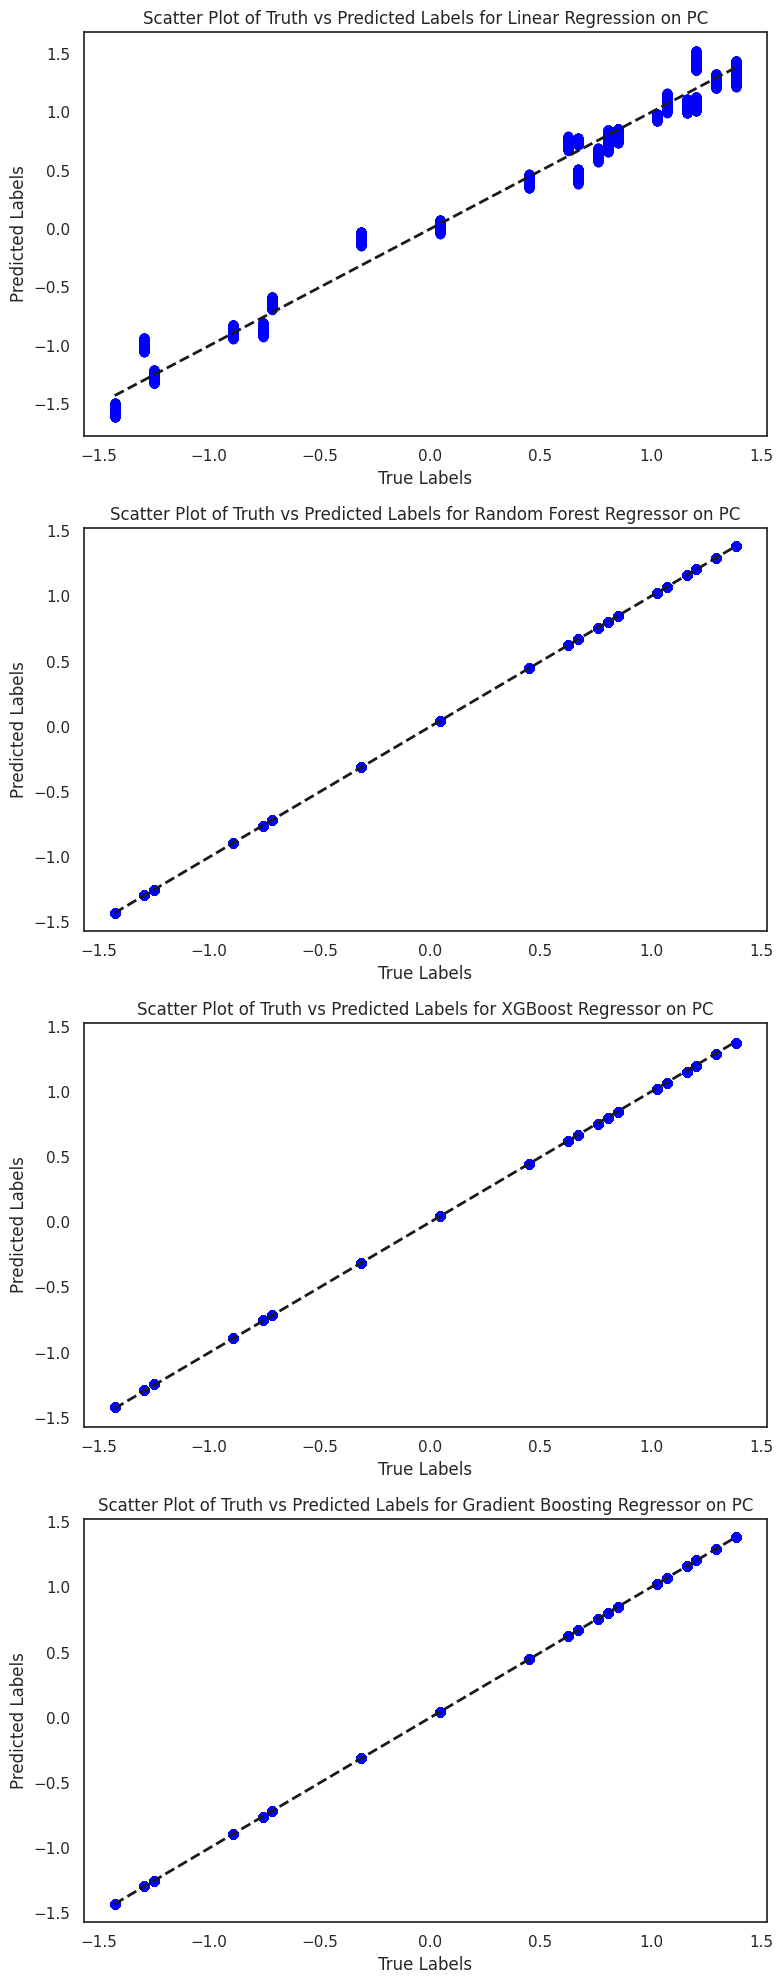

[INFO] Master results table updated and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
      Target                        Model  Train R²   Test R²           MAE  \
0  new_price            Linear Regression  0.685435  0.683708  4.393449e-01   
1  new_price      Random Forest Regressor  0.977331  0.851468  2.522105e-01   
2  new_price            XGBoost Regressor  0.840576  0.800946  3.279583e-01   
3  new_price  Gradient Boosting Regressor  0.803861  0.784936  3.431089e-01   
4         PC            Linear Regression  0.983019  0.982833  9.827928e-02   
5         PC      Random Forest Regressor  1.000000  1.000000  2.048259e-14   
6         PC            XGBoost Regressor  0.999957  0.999957  6.085647e-03   
7         PC  Gradient Boosting Regressor  1.000000  1.000000  1.082815e-08   

            MSE          RMSE          MAPE Comments  
0  3.140434e-01  5.603957e-01  2.390918e+02   Normal  
1  1.474763e-01  3.840264e-01  1.406676e+02   Normal  
2  1.976388e-01  4

In [ ]:
# ALL MODELS FOR PC BASE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to classify model performance
def classify_performance(train_r2, test_r2):
    """
    Classify the performance of a model based on Train R² and Test R² scores.
    """
    if train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    elif train_r2 > 0.9 and test_r2 < 0.7:
        return "Overfitting"
    else:
        return "Normal"
# Keep temporal columns in the dataset
temporal_columns = ['Year', 'Month', 'Day', 'DayOfWeek', 'ElapsedDays']

# Drop only non-temporal and irrelevant columns
features = merged_dataset.drop(columns=[
       'saleable_area(ft^2)', 'unit_rate', 'floor',
       'floor_size_compact600800', 'floor_size_large10001300',
       'floor_size_luxury25003000', 'floor_size_medium8001000',
       'floor_size_micro200400', 'floor_size_nano0200',
       'floor_size_premium20002500', 'floor_size_small400600',
       'floor_size_ultralux3000plus', 'floor_size_xl13001600',
       'floor_size_xxl16002000', 'YearQuarter_2021Q1', 'YearQuarter_2021Q2',
       'YearQuarter_2021Q3', 'YearQuarter_2021Q4', 'YearQuarter_2022Q1',
       'YearQuarter_2022Q2', 'YearQuarter_2022Q3', 'floor_height_floor_03to05',
       'floor_height_floor_06to08', 'floor_height_floor_09to10',
       'floor_height_floor_11to13', 'floor_height_floor_14to15',
       'floor_height_floor_16to18', 'floor_height_floor_19to20',
       'floor_height_floor_21to25', 'floor_height_floor_26to30',
       'floor_height_floor_31to35', 'floor_height_floor_36to40',
       'floor_height_floor_41to45', 'floor_height_floor_46to50',
       'floor_height_floor_above50', 'floor_height_floor_house03',
       'new_price', 'PC'  # Drop target variable
])

# Define `PC` as the target variable
target = merged_dataset[['PC']]  # Use only `PC` as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Initialize models and their names
models = [
    "Linear Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None),
    XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=500, max_depth=10),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Function to evaluate a single model
def evaluate_model(regressor, model_name, X_train, X_test, y_train, y_test, target_name):
    """
    Evaluate a single model and return the metrics as a dictionary.
    """
    # Fit the model
    regressor.fit(X_train, y_train.flatten())  # Flatten target array for compatibility
    train_prediction = regressor.predict(X_train)
    test_prediction = regressor.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, train_prediction)
    test_r2_score = r2_score(y_test, test_prediction)
    mae_val = mean_absolute_error(y_test, test_prediction)
    mse_val = mean_squared_error(y_test, test_prediction)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(np.abs((y_test.flatten() - test_prediction.flatten()) / np.where(y_test.flatten() == 0, 1, y_test.flatten()))) * 100

    # Classification of model performance
    comments = classify_performance(train_r2_score, test_r2_score)

    # Return results as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comments
    }

# Evaluate models for `PC` only
target_name = "PC"
y_train_target = y_train.to_numpy()
y_test_target = y_test.to_numpy()

new_results = []  # Store new results for the target

print(f"\n{'='*125}")
print(f"Training models for BASE target variable: {target_name}")
print(f"{'='*125}")

# Create a figure for scatter plots
num_models = len(models)
fig, axes = plt.subplots(num_models, 1, figsize=(8, 5 * num_models))  # One row for each model

# Loop through regressors
for i, (regressor, model_name) in enumerate(zip(regressors, models)):
    print(f"\n{'='*125}\nMODEL: {model_name}\n{'='*125}")

    # Evaluate the model and collect the results
    metrics = evaluate_model(regressor, model_name, X_train_scaled, X_test_scaled, y_train_target, y_test_target, target_name)
    new_results.append(metrics)

    # Display metrics and classification
    print(f"Train R² Score: {metrics['Train R²']:.3f}")
    print(f"Test R² Score: {metrics['Test R²']:.3f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.3f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.3f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.3f}%")
    print(f"Performance Classification: {metrics['Comments']}")

    # Generate scatter plot for truth vs predicted labels in the corresponding subplot
    ax = axes[i]
    ax.scatter(y_test_target, regressor.predict(X_test_scaled), alpha=0.6, color='blue')
    ax.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], 'k--', lw=2)
    ax.set_title(f'Scatter Plot of Truth vs Predicted Labels for {model_name} on {target_name}')
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predicted Labels')

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig(f"all_models_scatter_{target_name}.png")
plt.show()

# Update the master results table
if new_results:
    master_resultsStd = master_resultsStd[master_resultsStd["Target"] != target_name]
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame(new_results)], ignore_index=True)
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd)

In [ ]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'floor', 'CPI', 'IR', 'MW', 'M3',
       'UR', 'GDP', 'CI', 'HSI', 'HS', 'LS',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 'district_Tuen Mun District',
       'district_Wan Chai District', 'district_Yuen Long District',
       'floor_size_compact600800', 'flo

Loaded existing master results table from 'master_resultsStd.csv'.

Training models for target variable: PC with multicollinearity and potential overfitting addressed

MODEL: Linear Regression
Train R² Score: 0.983
Test R² Score: 0.983
Mean Absolute Error (MAE): 0.098
Mean Squared Error (MSE): 0.017
Root Mean Squared Error (RMSE): 0.131
Mean Absolute Percentage Error (MAPE): 16.303%
Performance Classification: Normal

MODEL: Random Forest Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
Mean Absolute Percentage Error (MAPE): 0.000%
Performance Classification: Normal

MODEL: XGBoost Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.001
Mean Absolute Percentage Error (MAPE): 0.011%
Performance Classification: Normal

MODEL: Gradient Boosting Regressor
Train R² Score: 1.000
Test R² S

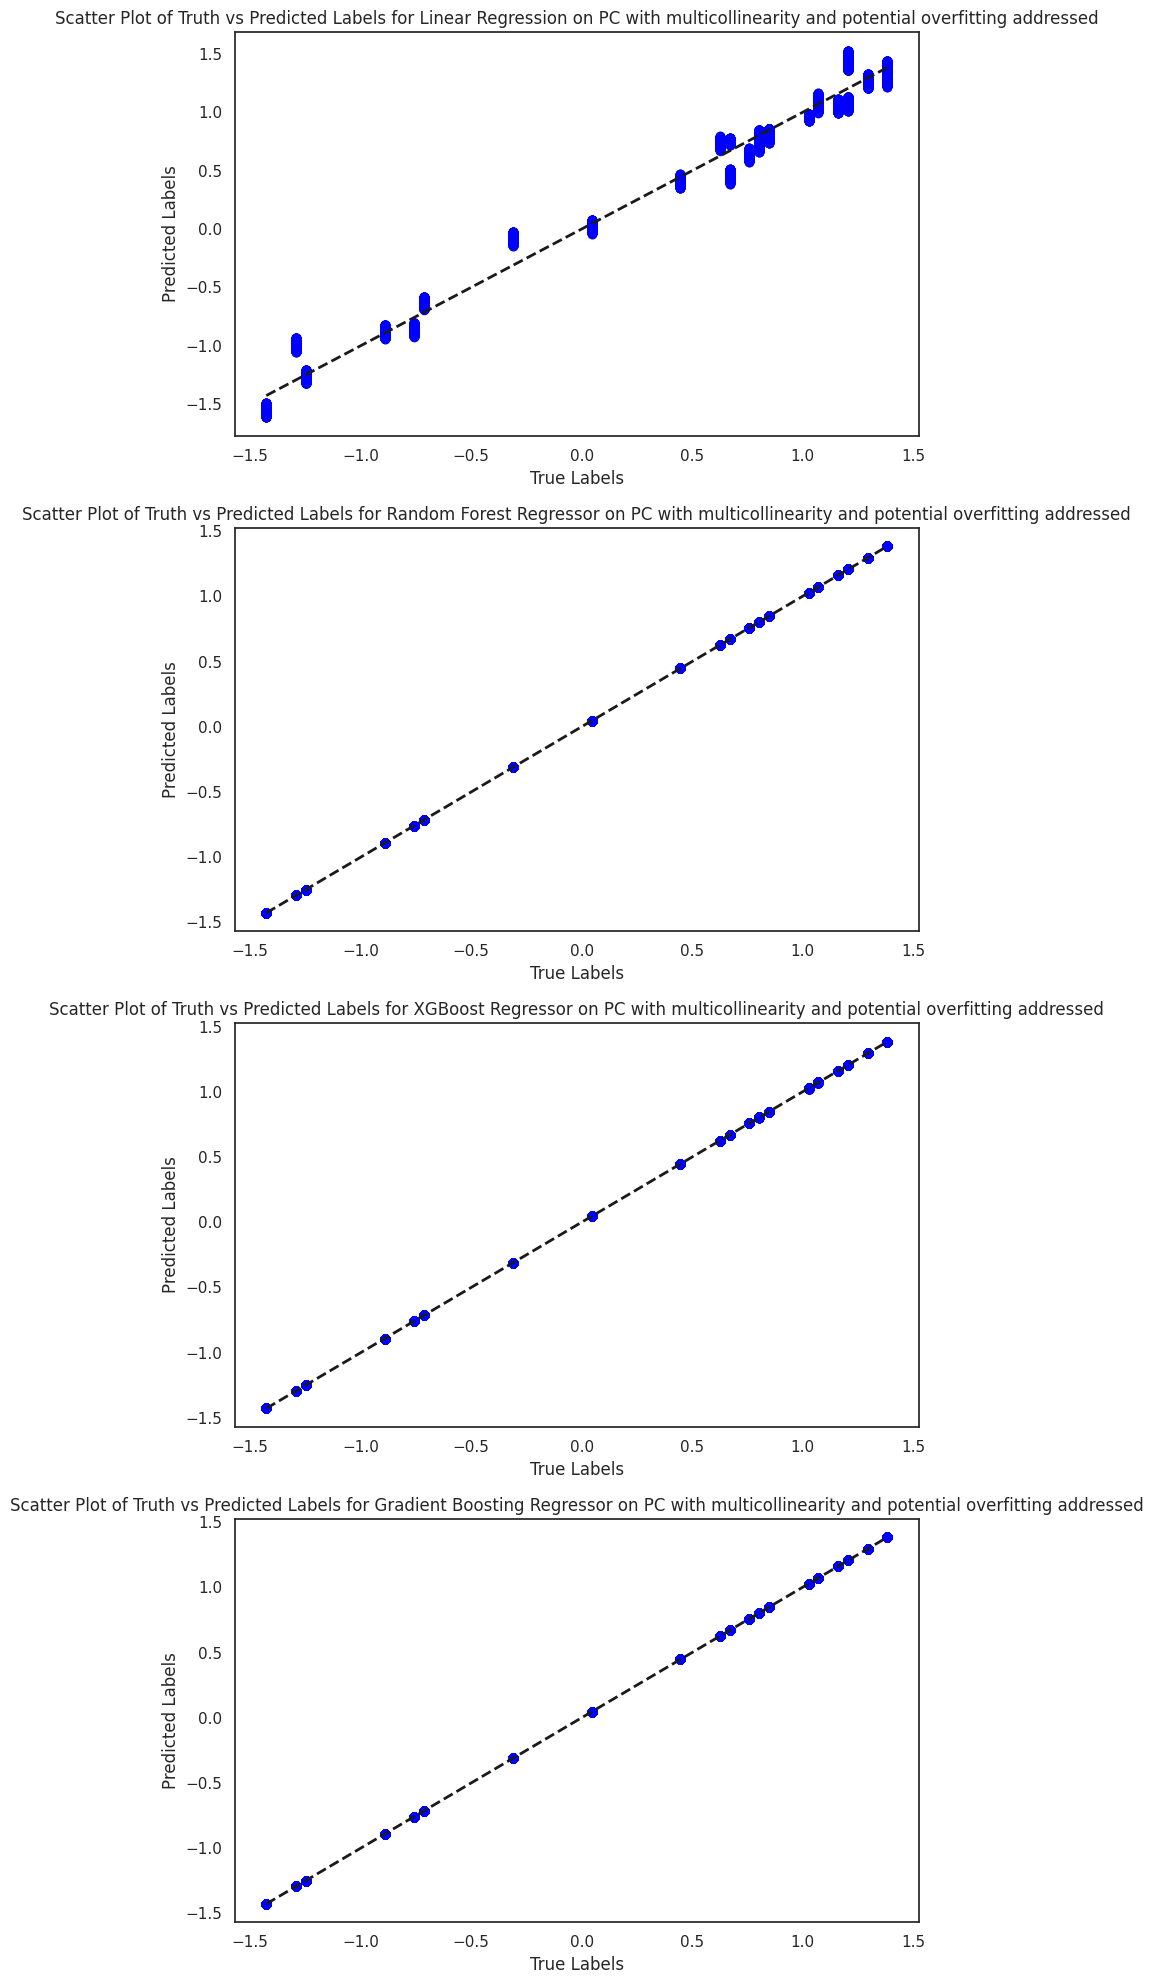

[INFO] Master results table updated and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
                                               Target  \
0                                           new_price   
1                                           new_price   
2                                           new_price   
3                                           new_price   
4                                                  PC   
5                                                  PC   
6                                                  PC   
7                                                  PC   
8   PC with multicollinearity and potential overfi...   
9   PC with multicollinearity and potential overfi...   
10  PC with multicollinearity and potential overfi...   
11  PC with multicollinearity and potential overfi...   

                          Model  Train R²   Test R²           MAE  \
0             Linear Regression  0.685435  0.683708  4.393449e-01   
1       Random 

In [ ]:
# ALL MODELS FOR PC with multicollinearity and potential overfitting addressed
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to classify model performance
def classify_performance(train_r2, test_r2):
    """
    Classify the performance of a model based on Train R² and Test R² scores.
    """
    if train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    elif train_r2 > 0.9 and test_r2 < 0.7:
        return "Overfitting"
    else:
        return "Normal"
# Keep temporal columns in the dataset
temporal_columns = ['Year', 'Month', 'Day', 'DayOfWeek', 'ElapsedDays']

# Drop only non-temporal and irrelevant columns
features = merged_dataset.drop(columns=[
       'saleable_area(ft^2)', 'unit_rate', 'floor',
       'floor_size_compact600800', 'floor_size_large10001300',
       'floor_size_luxury25003000', 'floor_size_medium8001000',
       'floor_size_micro200400', 'floor_size_nano0200',
       'floor_size_premium20002500', 'floor_size_small400600',
       'floor_size_ultralux3000plus', 'floor_size_xl13001600',
       'floor_size_xxl16002000', 'YearQuarter_2021Q1', 'YearQuarter_2021Q2',
       'YearQuarter_2021Q3', 'YearQuarter_2021Q4', 'YearQuarter_2022Q1',
       'YearQuarter_2022Q2', 'YearQuarter_2022Q3', 'floor_height_floor_03to05',
       'floor_height_floor_06to08', 'floor_height_floor_09to10',
       'floor_height_floor_11to13', 'floor_height_floor_14to15',
       'floor_height_floor_16to18', 'floor_height_floor_19to20',
       'floor_height_floor_21to25', 'floor_height_floor_26to30',
       'floor_height_floor_31to35', 'floor_height_floor_36to40',
       'floor_height_floor_41to45', 'floor_height_floor_46to50',
       'floor_height_floor_above50', 'floor_height_floor_house03',
       'new_price', 'PC'  # Drop target variable
])

# Define `PC` as the target variable
target = merged_dataset[['PC']]  # Use only `PC` as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Initialize models with regularization and hyperparameter settings
models = [
    "Linear Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=3),
    XGBRegressor(random_state=42, learning_rate=0.05, n_estimators=300, max_depth=8, reg_alpha=1, reg_lambda=1),
    GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, min_samples_split=5, min_samples_leaf=3, random_state=42)
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Function to evaluate a single model
def evaluate_model(regressor, model_name, X_train, X_test, y_train, y_test, target_name):
    """
    Evaluate a single model and return the metrics as a dictionary.
    """
    # Fit the model
    regressor.fit(X_train, y_train.flatten())  # Flatten target array for compatibility
    train_prediction = regressor.predict(X_train)
    test_prediction = regressor.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, train_prediction)
    test_r2_score = r2_score(y_test, test_prediction)
    mae_val = mean_absolute_error(y_test, test_prediction)
    mse_val = mean_squared_error(y_test, test_prediction)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(np.abs((y_test.flatten() - test_prediction.flatten()) / np.where(y_test.flatten() == 0, 1, y_test.flatten()))) * 100

    # Classification of model performance
    comments = classify_performance(train_r2_score, test_r2_score)

    # Return results as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comments
    }

# Evaluate models for `PC` only
target_name = "PC with multicollinearity and potential overfitting addressed"
y_train_target = y_train.to_numpy()
y_test_target = y_test.to_numpy()

new_results = []  # Store new results for the target

print(f"\n{'='*125}")
print(f"Training models for target variable: {target_name}")
print(f"{'='*125}")

# Create a figure for scatter plots
num_models = len(models)
fig, axes = plt.subplots(num_models, 1, figsize=(8, 5 * num_models))  # One row for each model

# Loop through regressors
for i, (regressor, model_name) in enumerate(zip(regressors, models)):
    print(f"\n{'='*125}\nMODEL: {model_name}\n{'='*125}")

    # Evaluate the model and collect the results
    metrics = evaluate_model(regressor, model_name, X_train_scaled, X_test_scaled, y_train_target, y_test_target, target_name)
    new_results.append(metrics)

    # Display metrics and classification
    print(f"Train R² Score: {metrics['Train R²']:.3f}")
    print(f"Test R² Score: {metrics['Test R²']:.3f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.3f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.3f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.3f}%")
    print(f"Performance Classification: {metrics['Comments']}")

    # Generate scatter plot for truth vs predicted labels in the corresponding subplot
    ax = axes[i]
    ax.scatter(y_test_target, regressor.predict(X_test_scaled), alpha=0.6, color='blue')
    ax.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], 'k--', lw=2)
    ax.set_title(f'Scatter Plot of Truth vs Predicted Labels for {model_name} on {target_name}')
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predicted Labels')

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig(f"all_models_scatter_{target_name}.png")
plt.show()

# Update the master results table
if new_results:
    # Remove existing rows for "PC with multicollinearity addressed"
    master_resultsStd = master_resultsStd[master_resultsStd["Target"] != target_name]
    # Append the new results
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame(new_results)], ignore_index=True)
    # Save the updated master results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd)

In [ ]:
pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
# ALL MODELS FOR PC WITH SIMPLIFIED TREE-BASED MODELS AND CROSS-VALIDATION
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import pandas as pd
import os

# Function to classify model performance
def classify_performance(train_r2, test_r2):
    """
    Classify the performance of a model based on Train R² and Test R² scores.
    """
    if train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    elif train_r2 > 0.9 and test_r2 < 0.7:
        return "Overfitting"
    else:
        return "Normal"
# Keep temporal columns in the dataset
temporal_columns = ['Year', 'Month', 'Day', 'DayOfWeek', 'ElapsedDays']

# Drop only non-temporal and irrelevant columns
features = merged_dataset.drop(columns=[
       'saleable_area(ft^2)', 'unit_rate', 'floor',
       'floor_size_compact600800', 'floor_size_large10001300',
       'floor_size_luxury25003000', 'floor_size_medium8001000',
       'floor_size_micro200400', 'floor_size_nano0200',
       'floor_size_premium20002500', 'floor_size_small400600',
       'floor_size_ultralux3000plus', 'floor_size_xl13001600',
       'floor_size_xxl16002000', 'YearQuarter_2021Q1', 'YearQuarter_2021Q2',
       'YearQuarter_2021Q3', 'YearQuarter_2021Q4', 'YearQuarter_2022Q1',
       'YearQuarter_2022Q2', 'YearQuarter_2022Q3', 'floor_height_floor_03to05',
       'floor_height_floor_06to08', 'floor_height_floor_09to10',
       'floor_height_floor_11to13', 'floor_height_floor_14to15',
       'floor_height_floor_16to18', 'floor_height_floor_19to20',
       'floor_height_floor_21to25', 'floor_height_floor_26to30',
       'floor_height_floor_31to35', 'floor_height_floor_36to40',
       'floor_height_floor_41to45', 'floor_height_floor_46to50',
       'floor_height_floor_above50', 'floor_height_floor_house03',
       'new_price', 'PC'  # Drop target variable
])
# Define `PC` as the target variable
target = merged_dataset[['PC']]  # Use only `PC` as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Initialize models
models = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.01),
    RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.01, reg_alpha=10, reg_lambda=10, subsample=0.8, random_state=42),
    GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.01, min_samples_split=10, min_samples_leaf=5, subsample=0.8, random_state=42)
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Function to manually perform k-fold cross-validation
def manual_kfold_cv(regressor, X_train, y_train, k=5):
    """
    Perform manual k-fold cross-validation.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores = []
    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        regressor.fit(X_fold_train, y_fold_train)
        val_pred = regressor.predict(X_fold_val)
        val_r2 = r2_score(y_fold_val, val_pred)
        cv_scores.append(val_r2)
    return np.mean(cv_scores), np.std(cv_scores)

# Function to evaluate the model and return metrics
def evaluate_model(regressor, model_name, X_train, y_train, X_test, y_test, target_name, k=5):
    """
    Evaluate the model and return metrics.
    """
    # Perform manual k-fold cross-validation
    cv_mean, cv_std = manual_kfold_cv(regressor, X_train, y_train, k=k)

    # Train and predict
    regressor.fit(X_train, y_train)
    train_pred = regressor.predict(X_train)
    test_pred = regressor.predict(X_test)

    # Compute metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    mae = mean_absolute_error(y_test, test_pred)
    mse = mean_squared_error(y_test, test_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test.ravel() - test_pred.ravel()) /
                          np.where(y_test.ravel() == 0, 1, y_test.ravel()))) * 100

    comments = classify_performance(train_r2, test_r2)

    # Return metrics as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Comments": comments
    }

# Evaluate models for `PC`
target_name = "PC with Simplified Tree-Based Models and Cross-Validation"
new_results = []

for regressor, model_name in zip(regressors, models):
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(regressor, model_name, X_train_scaled, y_train.to_numpy().flatten(), X_test_scaled, y_test.to_numpy().flatten(), target_name, k=5)
    new_results.append(metrics)

# Update the master results table
if new_results:
    master_resultsStd = master_resultsStd[master_resultsStd["Target"] != target_name]
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame(new_results)], ignore_index=True)
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master table.")

# Display updated table
print("\nUpdated Master Results Table:")
print(master_resultsStd)

Loaded existing master results table from 'master_resultsStd.csv'.
Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating Random Forest Regressor...
Evaluating XGBoost Regressor...
Evaluating Gradient Boosting Regressor...
[INFO] Master results table updated and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
                                               Target  \
0                                           new_price   
1                                           new_price   
2                                           new_price   
3                                           new_price   
4                                                  PC   
5                                                  PC   
6                                                  PC   
7                                                  PC   
8   PC with multicollinearity and potential overfi...   
9   PC with multicollinearity and potential overfi..

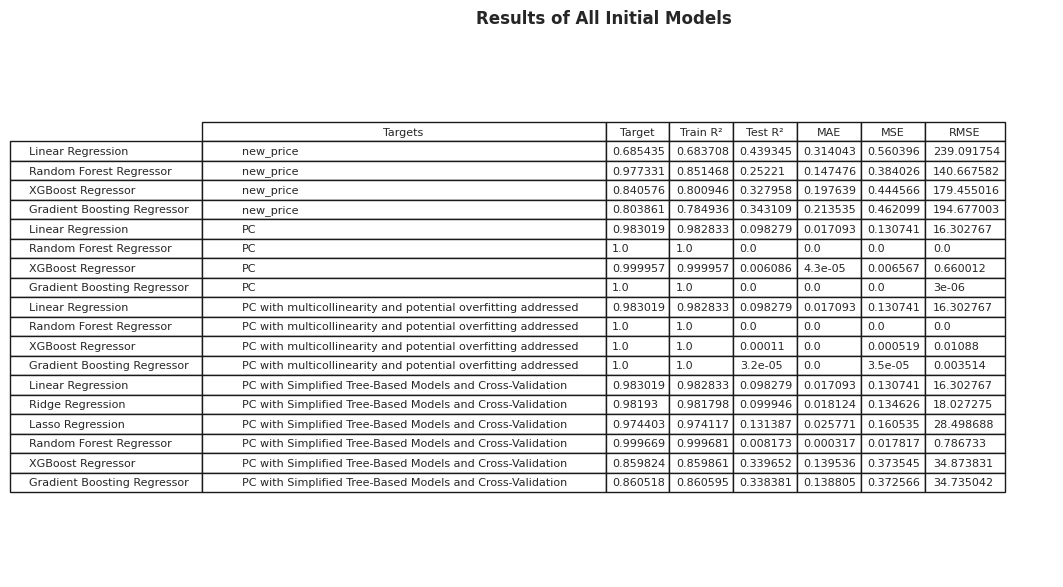

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Drop unnecessary columns and round numerical results to 6 decimal places
results_filtered = master_resultsStd.drop(columns=["Comments"])
results_filtered = results_filtered.round(6)  # Round all values to 6 decimal places

# Step 2: Transpose the table so that models are row labels and metrics are column labels
rotated_results = results_filtered.set_index("Model")  # Set 'Model' as index (row labels)

# Step 3: Create the plot for the table
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust width and height for readability
fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")

# Step 4: Create the table
table = ax.table(
    cellText=rotated_results.values,
    rowLabels=list(rotated_results.index),  # Row labels: Model names
    colLabels=["Targets"] + list(rotated_results.columns),  # Add "Models Tested" as a title for the first column
    cellLoc="left",  # Left-justify all data in the table
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size for readability
table.auto_set_column_width(col=list(range(len(rotated_results.columns) + 1)))  # Include "Models Tested"

# Step 5: Adjust layout to minimize white space
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95)  # Adjust margins for better fit

# Step 6: Title for the table
ax.set_title(
    "Results of All Initial Models",
    fontsize=12,
    fontweight="bold",
    pad=10  # Adjust padding for the title
)

# Step 7: Display the table
plt.show()

In [ ]:
from docx import Document

# Step 1: Drop unnecessary columns and round numerical results to 6 decimal places
results_filtered = master_resultsStd.drop(columns=["Comments"])
results_filtered = results_filtered.round(6)  # Round all values to 6 decimal places

# Step 2: Transpose the table so that models are row labels and metrics are column labels
rotated_results = results_filtered.set_index("Model")  # Set 'Model' as index (row labels)

# Step 3: Create a Word document
doc = Document()

# Step 4: Add a title for the table
doc.add_heading("Results of All Initial Models", level=1)

# Step 5: Add the table to the Word document
table = doc.add_table(rows=1, cols=len(rotated_results.columns) + 1)

# Add column headers
header_cells = table.rows[0].cells
header_cells[0].text = "Model"  # First column header
for i, column_name in enumerate(rotated_results.columns):
    header_cells[i + 1].text = column_name

# Add rows with data
for index, row in rotated_results.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(index)  # Row label (Model)
    for i, value in enumerate(row):
        row_cells[i + 1].text = str(value)  # Row values

# Step 6: Save the document with the specified name
file_name = "Results of Initial Models.docx"
doc.save(file_name)

print(f"Table exported to '{file_name}'")

Table exported to 'Results of Initial Models.docx'


In [ ]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'floor', 'CPI', 'IR', 'MW', 'M3',
       'UR', 'GDP', 'CI', 'HSI', 'HS', 'LS',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 'district_Tuen Mun District',
       'district_Wan Chai District', 'district_Yuen Long District',
       'floor_size_compact600800', 'flo

In [ ]:
master_resultsStd.head(20)


,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments
0,new_price,Linear Regression,0.685435,0.683708,4.393449e-01,3.140434e-01,5.603957e-01,2.390918e+02,Normal
1,new_price,Random Forest Regressor,0.977331,0.851468,2.522105e-01,1.474763e-01,3.840264e-01,1.406676e+02,Normal
2,new_price,XGBoost Regressor,0.840576,0.800946,3.279583e-01,1.976388e-01,4.445658e-01,1.794550e+02,Normal
3,new_price,Gradient Boosting Regressor,0.803861,0.784936,3.431089e-01,2.135351e-01,4.620986e-01,1.946770e+02,Normal
4,PC,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal
5,PC,Random Forest Regressor,1.000000,1.000000,2.048259e-14,8.368542e-28,2.892843e-14,2.048343e-12,Normal
6,PC,XGBoost Regressor,0.999957,0.999957,6.085647e-03,4.312855e-05,6.567233e-03,6.600120e-01,Normal
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.082815e-08,2.147548e-16,1.465452e-08,2.531636e-06,Normal
8,PC with multicollinearity and potential overfi...,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal
9,PC with multicollinearity and potential overfi...,Random Forest Regressor,1.000000,1.000000,1.946421e-14,7.698179e-28,2.774559e-14,1.960379e-12,Normal


# BASE LSTM MODEL (using just 5 Epochs and a simple network to make sure it works as processing for full model with 50 epochs takes a long time)

BASE LSTM FOR new_price

In [ ]:
# BASE LSTM FOR new_price
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# File path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Backup the master results table before making any modifications
backup_resultsStd = master_resultsStd.copy()

# Prepare features and target for `new_price`
features = merged_dataset.drop(columns=["new_price", "unit_rate", "PC"])  # Drop target columns from features
target = merged_dataset["new_price"]  # Target is `new_price`

# Initialize scalers
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM architecture
lstm_model = Sequential([
    LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32, activation="relu"),
    Dropout(0.3),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")

# Train the model
lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=5,  # Train for 5 epochs
    batch_size=32,
    verbose=1,
    validation_data=(X_test_lstm, y_test)
)

# Predictions and metrics
train_prediction = lstm_model.predict(X_train_lstm)
test_prediction = lstm_model.predict(X_test_lstm)

# Inverse transform predictions and true values for metrics
train_prediction_rescaled = target_scaler.inverse_transform(train_prediction)
test_prediction_rescaled = target_scaler.inverse_transform(test_prediction)
y_train_rescaled = target_scaler.inverse_transform(y_train)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# Calculate metrics
train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
rmse_val = np.sqrt(mse_val)
mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) /
                          np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

# Performance comments
if train_r2_score - test_r2_score > 0.1:
    comment = "Overfitting"
elif train_r2_score < 0.5 and test_r2_score < 0.5:
    comment = "Underfitting or Failing"
elif test_r2_score > 0.75 and mape_val < 10:
    comment = "Working Well"
else:
    comment = "Needs Improvement"

# Store results for `new_price`
new_result = {
    "Target": "new_price",
    "Model": "Base new_price LSTM",
    "Train R²": train_r2_score,
    "Test R²": test_r2_score,
    "MAE": mae_val,
    "MSE": mse_val,
    "RMSE": rmse_val,
    "MAPE": mape_val,
    "Comments": comment
}

# Update the master results table
target_name = "new_price"
if new_result:
    # Remove existing rows for the current target and model
    master_resultsStd = master_resultsStd[
        ~((master_resultsStd["Target"] == target_name) & (master_resultsStd["Model"] == "Base new_price LSTM"))
    ]

    # Append the new results
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame([new_result])], ignore_index=True)

    # Save the updated results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated for `new_price` and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add for `new_price`. Restoring original results.")
    master_resultsStd = backup_resultsStd  # Restore the backup to prevent data loss

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd.to_string(index=False))

[INFO] Loaded existing master results table from 'master_resultsStd.csv'.
Epoch 1/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 0.4513 - val_loss: 0.2859
Epoch 2/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.3149 - val_loss: 0.2748
Epoch 3/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.3033 - val_loss: 0.2708
Epoch 4/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2931 - val_loss: 0.2699
Epoch 5/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2916 - val_loss: 0.2645
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[INFO] Master results table updated for `new_price` and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
                                                       Target                       Model  Train R²  Test R²          MAE          MSE         RMSE         MAPE          Comments
                                                    new_price           Linear Regression  0.685435 0.6

BASE LSTM FOR PC

In [ ]:
# BASE LSTM FOR PC
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# File path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Backup the master results table before making any modifications
backup_resultsStd = master_resultsStd.copy()

# Prepare features and target for `PC`
features = merged_dataset.drop(columns=["new_price", "unit_rate", "PC"])  # Drop target columns from features
target = merged_dataset["PC"]  # Target is `PC`

# Initialize scalers
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM architecture
lstm_model = Sequential([
    LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32, activation="relu"),
    Dropout(0.3),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")

# Train the model
lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=5,  # Train for 5 epochs
    batch_size=32,
    verbose=1,
    validation_data=(X_test_lstm, y_test)
)

# Predictions and metrics
train_prediction = lstm_model.predict(X_train_lstm)
test_prediction = lstm_model.predict(X_test_lstm)

# Inverse transform predictions and true values for metrics
train_prediction_rescaled = target_scaler.inverse_transform(train_prediction)
test_prediction_rescaled = target_scaler.inverse_transform(test_prediction)
y_train_rescaled = target_scaler.inverse_transform(y_train)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# Calculate metrics
train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
rmse_val = np.sqrt(mse_val)
mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) /
                          np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

# Performance comments
if train_r2_score - test_r2_score > 0.1:
    comment = "Overfitting"
elif train_r2_score < 0.5 and test_r2_score < 0.5:
    comment = "Underfitting or Failing"
elif test_r2_score > 0.75 and mape_val < 10:
    comment = "Working Well"
else:
    comment = "Needs Improvement"

# Store results for `PC`
new_result = {
    "Target": "PC",
    "Model": "Base PC LSTM",
    "Train R²": train_r2_score,
    "Test R²": test_r2_score,
    "MAE": mae_val,
    "MSE": mse_val,
    "RMSE": rmse_val,
    "MAPE": mape_val,
    "Comments": comment
}

# Update the master results table
target_name = "PC"
if new_result:
    # Remove existing rows for the current target and model
    master_resultsStd = master_resultsStd[
        ~((master_resultsStd["Target"] == target_name) & (master_resultsStd["Model"] == "Base PC LSTM"))
    ]

    # Append the new results
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame([new_result])], ignore_index=True)

    # Save the updated results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated for `PC` and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add for `PC`. Restoring original results.")
    master_resultsStd = backup_resultsStd  # Restore the backup to prevent data loss

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd.to_string(index=False))

[INFO] Loaded existing master results table from 'master_resultsStd.csv'.
Epoch 1/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.1314 - val_loss: 0.0022
Epoch 2/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0315 - val_loss: 0.0017
Epoch 3/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0305 - val_loss: 0.0027
Epoch 4/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0300 - val_loss: 8.8425e-04
Epoch 5/5
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0295 - val_loss: 0.0013
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[INFO] Master results table updated for `PC` and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
                                                       Target                       Model  Train R²  Test R²          MAE          MSE         RMSE         MAPE          Comments
                                                    new_price           Linear Regression  0.685435 0.683

In [ ]:
master_resultsStd.head(30)


,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments
0,new_price,Linear Regression,0.685435,0.683708,4.393449e-01,3.140434e-01,5.603957e-01,2.390918e+02,Normal
1,new_price,Random Forest Regressor,0.977331,0.851468,2.522105e-01,1.474763e-01,3.840264e-01,1.406676e+02,Normal
2,new_price,XGBoost Regressor,0.840576,0.800946,3.279583e-01,1.976388e-01,4.445658e-01,1.794550e+02,Normal
3,new_price,Gradient Boosting Regressor,0.803861,0.784936,3.431089e-01,2.135351e-01,4.620986e-01,1.946770e+02,Normal
4,PC,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal
5,PC,Random Forest Regressor,1.000000,1.000000,2.048259e-14,8.368542e-28,2.892843e-14,2.048343e-12,Normal
6,PC,XGBoost Regressor,0.999957,0.999957,6.085647e-03,4.312855e-05,6.567233e-03,6.600120e-01,Normal
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.082815e-08,2.147548e-16,1.465452e-08,2.531636e-06,Normal
8,PC with multicollinearity and potential overfi...,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal
9,PC with multicollinearity and potential overfi...,Random Forest Regressor,1.000000,1.000000,1.946421e-14,7.698179e-28,2.774559e-14,1.960379e-12,Normal


# ENHANCED LSTM ADDING EPOCHS AND COMPLEXITY

ENHANCED LSTM FOR new_price

[INFO] Loaded existing master results table from 'master_resultsStd.csv'.
Epoch 1/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.5042 - val_loss: 0.2922
Epoch 2/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.3385 - val_loss: 0.2777
Epoch 3/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.3275 - val_loss: 0.2768
Epoch 4/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.3206 - val_loss: 0.2711
Epoch 5/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.3157 - val_loss: 0.2690
Epoch 6/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.3113 - val_loss: 0.2692
Epoch 7/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.3117 - val_loss: 0.2629
Epoch 8/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.3109 - val_loss: 0.2663
Epoch 9/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.3053 - val_loss: 0.2630
Epoch 10/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3008 - val_loss: 0.2629
Epoch 11/50
2628/2628 ━━━━━━━━━━━━━

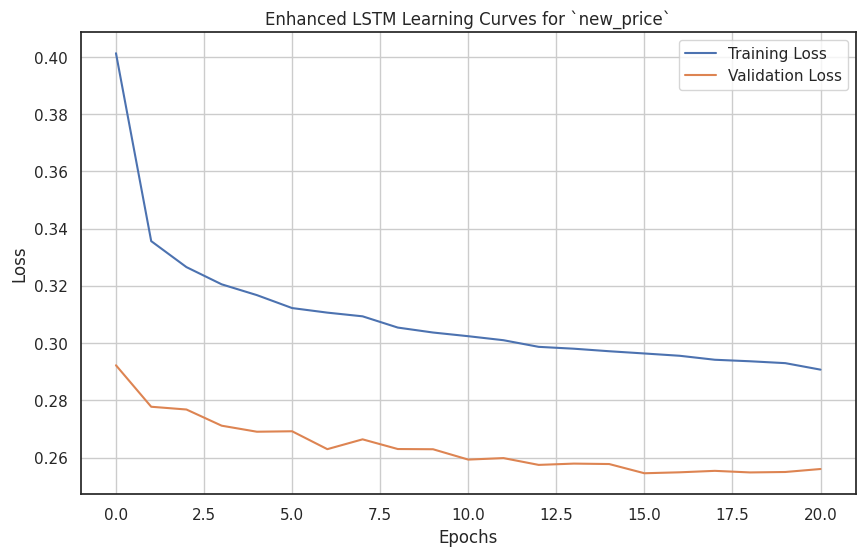

In [ ]:
# ENHANCED LSTM FOR new_price
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# File path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Type", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Backup the master results table before making any modifications
backup_resultsStd = master_resultsStd.copy()

# Prepare features and target for `new_price`
features = merged_dataset.drop(columns=["new_price", "unit_rate", "PC"])  # Drop target columns
target = merged_dataset["new_price"]  # Target is `new_price`

# Initialize scalers
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define Enhanced LSTM architecture
lstm_model = Sequential([
    LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32, activation="relu", return_sequences=True),
    Dropout(0.3),
    LSTM(16, activation="relu"),
    Dropout(0.3),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stop training if val_loss doesn't improve for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model
history = lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_lstm, y_test),
    callbacks=[early_stopping]
)

# Predictions and metrics
train_prediction = lstm_model.predict(X_train_lstm)
test_prediction = lstm_model.predict(X_test_lstm)

# Inverse transform predictions and true values for metrics
train_prediction_rescaled = target_scaler.inverse_transform(train_prediction)
test_prediction_rescaled = target_scaler.inverse_transform(test_prediction)
y_train_rescaled = target_scaler.inverse_transform(y_train)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# Calculate metrics
train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
rmse_val = np.sqrt(mse_val)
mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) /
                          np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

# Performance comments
if train_r2_score - test_r2_score > 0.1:
    comment = "Overfitting"
elif train_r2_score < 0.5 and test_r2_score < 0.5:
    comment = "Underfitting or Failing"
elif test_r2_score > 0.75 and mape_val < 10:
    comment = "Working Well"
else:
    comment = "Needs Improvement"

# Store results for `new_price`
new_result = {
    "Target": "new_price",
    "Model": "Enhanced LSTM",
    "Type": "Neural Network",
    "Train R²": train_r2_score,
    "Test R²": test_r2_score,
    "MAE": mae_val,
    "MSE": mse_val,
    "RMSE": rmse_val,
    "MAPE": mape_val,
    "Comments": comment
}

# Update the master results table
target_name = "new_price"
if new_result:
    # Remove existing rows for the current target and model
    master_resultsStd = master_resultsStd[
        ~((master_resultsStd["Target"] == target_name) & (master_resultsStd["Model"] == "Enhanced LSTM"))
    ]

    # Append the new results
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame([new_result])], ignore_index=True)

    # Save the updated results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated for `new_price` and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add for `new_price`. Restoring original results.")
    master_resultsStd = backup_resultsStd  # Restore the backup to prevent data loss

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd.to_string(index=False))

# Plot LSTM learning curves
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Enhanced LSTM Learning Curves for `new_price`")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

 ENHANCED LSTM FOR PC

[INFO] Loaded existing master results table from 'master_resultsStd.csv'.
Epoch 1/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.2132 - val_loss: 0.0054
Epoch 2/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0630 - val_loss: 0.0044
Epoch 3/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0580 - val_loss: 0.0030
Epoch 4/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0575 - val_loss: 0.0032
Epoch 5/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.0560 - val_loss: 0.0036
Epoch 6/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0560 - val_loss: 0.0028
Epoch 7/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0555 - val_loss: 0.0015
Epoch 8/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0552 - val_loss: 0.0015
Epoch 9/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0551 - val_loss: 0.0022
Epoch 10/50
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0553 - val_loss: 0.0026
Epoch 11/50
2628/2628 ━━━━━━━━━━━━━

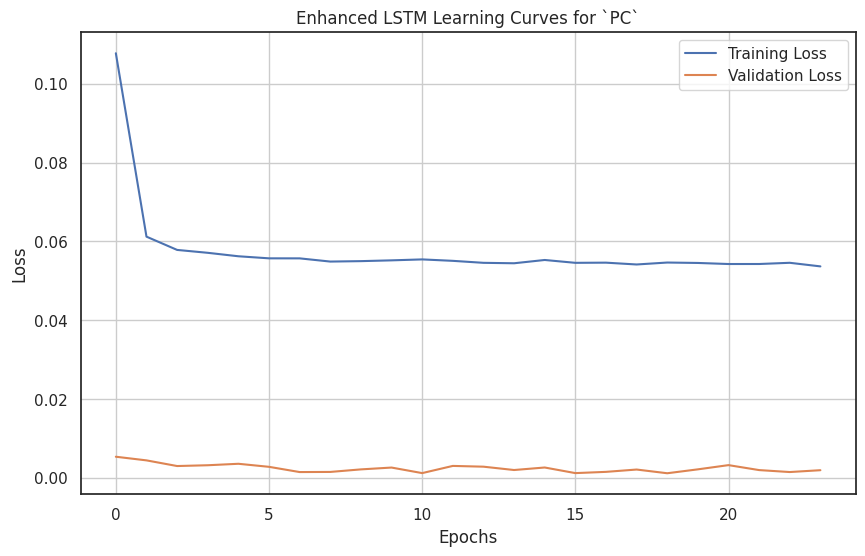

In [ ]:
# ENHANCED LSTM FOR PC
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# File path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Type", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Backup the master results table before making any modifications
backup_resultsStd = master_resultsStd.copy()

# Prepare features and target for `PC`
features = merged_dataset.drop(columns=["new_price", "unit_rate", "PC"])  # Drop target columns
target = merged_dataset["PC"]  # Target is `PC`

# Initialize scalers
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define Enhanced LSTM architecture
lstm_model = Sequential([
    LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32, activation="relu", return_sequences=True),
    Dropout(0.3),
    LSTM(16, activation="relu"),
    Dropout(0.3),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stop training if val_loss doesn't improve for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model
history = lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_lstm, y_test),
    callbacks=[early_stopping]
)

# Predictions and metrics
train_prediction = lstm_model.predict(X_train_lstm)
test_prediction = lstm_model.predict(X_test_lstm)

# Inverse transform predictions and true values for metrics
train_prediction_rescaled = target_scaler.inverse_transform(train_prediction)
test_prediction_rescaled = target_scaler.inverse_transform(test_prediction)
y_train_rescaled = target_scaler.inverse_transform(y_train)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# Calculate metrics
train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
rmse_val = np.sqrt(mse_val)
mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) /
                          np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

# Performance comments
if train_r2_score - test_r2_score > 0.1:
    comment = "Overfitting"
elif train_r2_score < 0.5 and test_r2_score < 0.5:
    comment = "Underfitting or Failing"
elif test_r2_score > 0.75 and mape_val < 10:
    comment = "Working Well"
else:
    comment = "Needs Improvement"

# Store results for `PC`
new_result = {
    "Target": "PC",
    "Model": "Enhanced LSTM",
    "Type": "Neural Network",
    "Train R²": train_r2_score,
    "Test R²": test_r2_score,
    "MAE": mae_val,
    "MSE": mse_val,
    "RMSE": rmse_val,
    "MAPE": mape_val,
    "Comments": comment
}

# Update the master results table
target_name = "PC"
if new_result:
    # Remove existing rows for the current target and model
    master_resultsStd = master_resultsStd[
        ~((master_resultsStd["Target"] == target_name) & (master_resultsStd["Model"] == "Enhanced LSTM"))
    ]

    # Append the new results
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame([new_result])], ignore_index=True)

    # Save the updated results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated for `PC` and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add for `PC`. Restoring original results.")
    master_resultsStd = backup_resultsStd  # Restore the backup to prevent data loss

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd.to_string(index=False))

# Plot LSTM learning curves
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Enhanced LSTM Learning Curves for `PC`")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
master_resultsStd.head(30)


,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments,Type
0,new_price,Linear Regression,0.685435,0.683708,4.393449e-01,3.140434e-01,5.603957e-01,2.390918e+02,Normal,NaN
1,new_price,Random Forest Regressor,0.977331,0.851468,2.522105e-01,1.474763e-01,3.840264e-01,1.406676e+02,Normal,NaN
2,new_price,XGBoost Regressor,0.840576,0.800946,3.279583e-01,1.976388e-01,4.445658e-01,1.794550e+02,Normal,NaN
3,new_price,Gradient Boosting Regressor,0.803861,0.784936,3.431089e-01,2.135351e-01,4.620986e-01,1.946770e+02,Normal,NaN
4,PC,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal,NaN
5,PC,Random Forest Regressor,1.000000,1.000000,2.048259e-14,8.368542e-28,2.892843e-14,2.048343e-12,Normal,NaN
6,PC,XGBoost Regressor,0.999957,0.999957,6.085647e-03,4.312855e-05,6.567233e-03,6.600120e-01,Normal,NaN
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.082815e-08,2.147548e-16,1.465452e-08,2.531636e-06,Normal,NaN
8,PC with multicollinearity and potential overfi...,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal,NaN
9,PC with multicollinearity and potential overfi...,Random Forest Regressor,1.000000,1.000000,1.946421e-14,7.698179e-28,2.774559e-14,1.960379e-12,Normal,NaN


                                               Target  \
0                                           new_price   
1                                           new_price   
2                                           new_price   
3                                           new_price   
4                                                  PC   
5                                                  PC   
6                                                  PC   
7                                                  PC   
8   PC with multicollinearity and potential overfi...   
9   PC with multicollinearity and potential overfi...   
10  PC with multicollinearity and potential overfi...   
11  PC with multicollinearity and potential overfi...   
12  PC with Simplified Tree-Based Models and Cross...   
13  PC with Simplified Tree-Based Models and Cross...   
14  PC with Simplified Tree-Based Models and Cross...   
15  PC with Simplified Tree-Based Models and Cross...   
16  PC with Simplified Tree-Bas

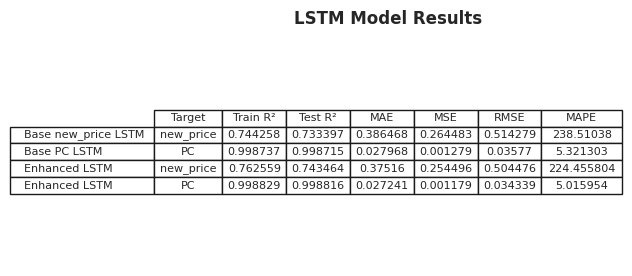

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Print all results in master_resultsStd
print(master_resultsStd)

# Step 2: Filter only LSTM models
lstm_results = master_resultsStd[master_resultsStd["Model"].str.contains("LSTM", case=False, na=False)]

# Step 3: Drop unnecessary columns ("Comments" and "Type") and round numerical results to 6 decimal places
results_filtered = lstm_results.drop(columns=["Comments", "Type"])  # Remove 'Comments' and 'Type' columns
results_filtered = results_filtered.round(6)  # Round all numerical values to 6 decimal places

# Step 4: Transpose the table so that models are row labels and metrics are column labels
rotated_results = results_filtered.set_index("Model")  # Set 'Model' as the index (row labels)

# Step 5: Create the plot for the table
fig, ax = plt.subplots(figsize=(4.13, 2.92))  # 25% of an A4 page (width x height in inches)
ax.axis("off")  # Turn off the axes
ax.axis("tight")  # Adjust the layout to make it tight

# Dynamically generate row labels based on the index structure
try:
    # If the index is multi-level, format row labels as `Target (Model)`
    rowLabels = [f"{t} ({m})" for t, m in rotated_results.index]
except ValueError:
    # If the index is single-level, use it directly
    rowLabels = rotated_results.index.tolist()

# Step 6: Create the table
table = ax.table(
    cellText=rotated_results.values,  # Table cell values
    rowLabels=rowLabels,  # Row labels (based on the index)
    colLabels=rotated_results.columns,  # Column labels (metrics)
    cellLoc="center",  # Align text in the center of cells
    loc="center"  # Place the table at the center of the figure
)

# Step 7: Adjust table font size and column width for better readability
table.auto_set_font_size(False)
table.set_fontsize(8)  # Set a readable font size
table.auto_set_column_width(col=list(range(len(rotated_results.columns))))  # Auto-adjust column widths

# Step 8: Set the title for the table
ax.set_title("LSTM Model Results", fontsize=12, fontweight="bold", pad=10)

# Step 9: Display the table
plt.tight_layout()
plt.show()

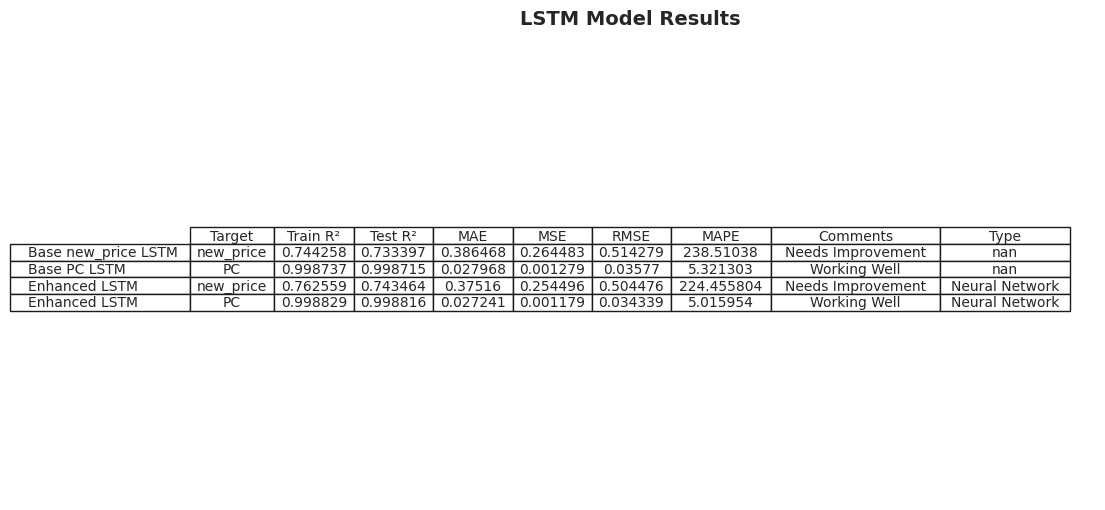

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter only the relevant rows for Base LSTM and Enhanced LSTM models
results_filtered = master_resultsStd[
    master_resultsStd["Model"].str.contains("Base|Enhanced")  # Filters rows with "Base" or "Enhanced" in the Model column
].copy()

# Step 2: Round numerical results to 6 decimal places
results_filtered = results_filtered.round(6)

# Step 3: Set 'Model' as the index
rotated_results = results_filtered.set_index("Model")  # Set 'Model' as row labels

# Step 4: Create the plot for the table
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust width and height for readability
fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")

# Step 5: Create the table
table = ax.table(
    cellText=rotated_results.values,  # Data values from DataFrame
    rowLabels=list(rotated_results.index),  # Row labels: Model names
    colLabels=rotated_results.columns,  # Column labels from DataFrame
    cellLoc="center",  # Center-align all data in the table
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size for readability
table.auto_set_column_width(col=list(range(len(rotated_results.columns) + 1)))  # Adjust column widths

# Step 6: Set title for the table
ax.set_title(
    "LSTM Model Results",
    fontsize=14,
    fontweight="bold",
    pad=10  # Adjust padding for the title
)

# Step 7: Display the table
plt.show()

In [ ]:
from docx import Document

# Step 1: Filter only the relevant rows for Base LSTM and Enhanced LSTM models
results_filtered = master_resultsStd[
    master_resultsStd["Model"].str.contains("Base|Enhanced")  # Filters rows with "Base" or "Enhanced" in the Model column
].copy()

# Step 2: Round numerical results to 6 decimal places
results_filtered = results_filtered.round(6)

# Step 3: Set 'Model' as the index
rotated_results = results_filtered.set_index("Model")  # Set 'Model' as row labels

# Step 4: Create a Word document
doc = Document()

# Step 5: Add a title for the table
doc.add_heading("LSTM Model Results", level=1)

# Step 6: Add the table to the Word document
table = doc.add_table(rows=1, cols=len(rotated_results.columns) + 1)

# Add column headers
header_cells = table.rows[0].cells
header_cells[0].text = "Model"  # First column header
for i, column_name in enumerate(rotated_results.columns):
    header_cells[i + 1].text = column_name

# Add rows with data
for index, row in rotated_results.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(index)  # Row label (Model)
    for i, value in enumerate(row):
        row_cells[i + 1].text = str(value)  # Row values

# Step 7: Save the document with the specified name
file_name = "initialLSTM_results.docx"
doc.save(file_name)

print(f"Table exported to '{file_name}'")

Table exported to 'initialLSTM_results.docx'


In [ ]:
print(master_resultsStd.head())  # Inspect the first few rows
print(master_resultsStd.shape)  # Check the shape of the DataFrame
print(master_resultsStd.columns)  # Ensure all original columns are there

      Target                        Model  Train R²   Test R²       MAE  \
0  new_price            Linear Regression  0.685435  0.683708  0.439345   
1  new_price      Random Forest Regressor  0.977331  0.851468  0.252210   
2  new_price            XGBoost Regressor  0.840576  0.800946  0.327958   
3  new_price  Gradient Boosting Regressor  0.803861  0.784936  0.343109   
4         PC            Linear Regression  0.983019  0.982833  0.098279   

        MSE      RMSE        MAPE Comments Type  
0  0.314043  0.560396  239.091754   Normal  NaN  
1  0.147476  0.384026  140.667582   Normal  NaN  
2  0.197639  0.444566  179.455016   Normal  NaN  
3  0.213535  0.462099  194.677003   Normal  NaN  
4  0.017093  0.130741   16.302767   Normal  NaN  
(22, 10)
Index(['Target', 'Model', 'Train R²', 'Test R²', 'MAE', 'MSE', 'RMSE', 'MAPE',
       'Comments', 'Type'],
      dtype='object')


In [ ]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'floor', 'CPI', 'IR', 'MW', 'M3',
       'UR', 'GDP', 'CI', 'HSI', 'HS', 'LS',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 'district_Tuen Mun District',
       'district_Wan Chai District', 'district_Yuen Long District',
       'floor_size_compact600800', 'flo

# SAVING THE RESULTS

In [ ]:
master_resultsStd.head()



,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments,Type
0,new_price,Linear Regression,0.685435,0.683708,0.439345,0.314043,0.560396,239.091754,Normal,NaN
1,new_price,Random Forest Regressor,0.977331,0.851468,0.252210,0.147476,0.384026,140.667582,Normal,NaN
2,new_price,XGBoost Regressor,0.840576,0.800946,0.327958,0.197639,0.444566,179.455016,Normal,NaN
3,new_price,Gradient Boosting Regressor,0.803861,0.784936,0.343109,0.213535,0.462099,194.677003,Normal,NaN
4,PC,Linear Regression,0.983019,0.982833,0.098279,0.017093,0.130741,16.302767,Normal,NaN


In [ ]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define file path for saving the DataFrame as 'Std_Datasetv5.csv'
file_path = os.path.join(subdirectory, 'Std_Datasetv5.csv')

# Save the DataFrame to the file path
try:
    merged_dataset.to_csv(file_path, index=False)
    print(f"[INFO] File 'Std_Datasetv5.csv' saved successfully at '{file_path}'.")
except NameError:
    print("[ERROR] The DataFrame 'merged_dataset' does not exist. Please define it before saving.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the file: {e}")

Mounted at /content/drive
[INFO] File 'Std_Datasetv5.csv' saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv5.csv'.


In [ ]:
# Install python-docx
!pip install python-docx

# Import required libraries
import os
from docx import Document
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Step 1: Use the existing DataFrame
try:
    df = master_resultsStd.head(20)  # Use the first 20 rows of the already loaded DataFrame
    print("[INFO] DataFrame 'master_resultsStd' is already loaded and limited to the first 20 rows.")
except NameError:
    print("[ERROR] The DataFrame 'master_resultsStd' does not exist. Please ensure it is loaded.")
    raise
except Exception as e:
    print(f"[ERROR] An unexpected error occurred: {e}")
    raise

# Step 2: Create a Word document
doc = Document()

# Add a title to the document
doc.add_heading("Master Results Table", level=1)

# Step 3: Add a table to the Word document
table = doc.add_table(rows=1, cols=len(df.columns))

# Add column headers to the table
header_cells = table.rows[0].cells
for i, column_name in enumerate(df.columns):
    header_cells[i].text = column_name

# Add data rows to the table
for _, row in df.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

# Step 4: Save the Word document to the subdirectory
output_file = os.path.join(subdirectory, 'master_resultsStd.doc')  # Save as master_resultsStd.doc

try:
    doc.save(output_file)
    print(f"[INFO] Word document saved successfully at '{output_file}'.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the Word document: {e}")
    raise

Mounted at /content/drive
[INFO] DataFrame 'master_resultsStd' is already loaded and limited to the first 20 rows.
[INFO] Word document saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/master_resultsStd.doc'.


In [ ]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define file path for saving the DataFrame
file_path = os.path.join(subdirectory, 'master_resultsStd.csv')  # Change the filename

# Save the DataFrame to the file path
try:
    master_resultsStd.to_csv(file_path, index=False)
    print(f"[INFO] File 'master_resultsStd.csv' saved successfully at '{file_path}'.")
except NameError:
    print("[ERROR] The DataFrame 'master_resultsStd' does not exist. Please define it before saving.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the file: {e}")

Mounted at /content/drive
[INFO] File 'master_resultsStd.csv' saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/master_resultsStd.csv'.


In [ ]:
merged_dataset.shape

(105114, 71)